In [1]:
import matplotlib.pyplot as plt
import numpy as np
from JSAnimation import IPython_display
from matplotlib import animation

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



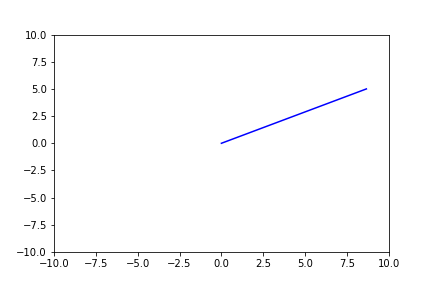
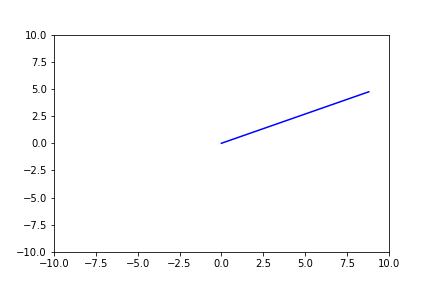
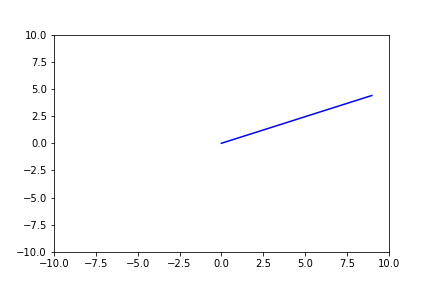
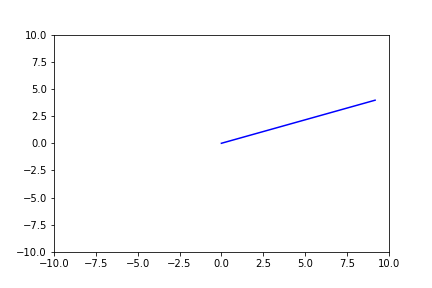
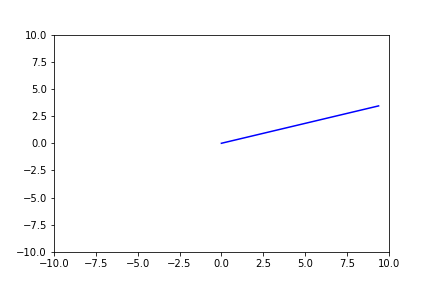
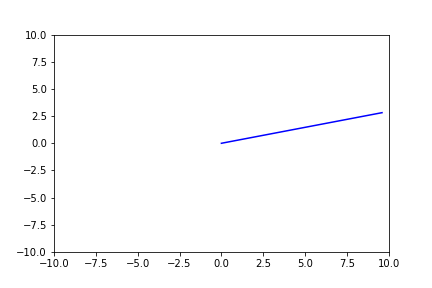
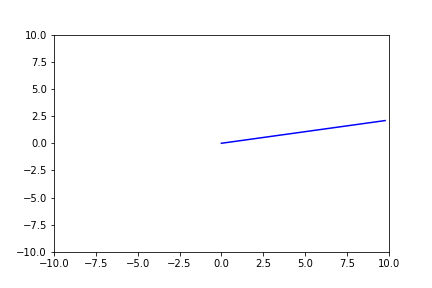
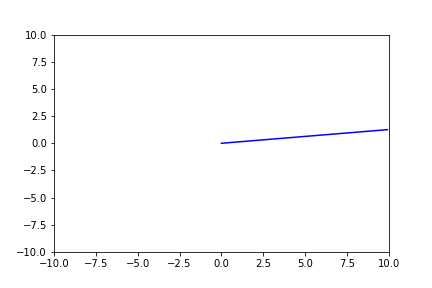
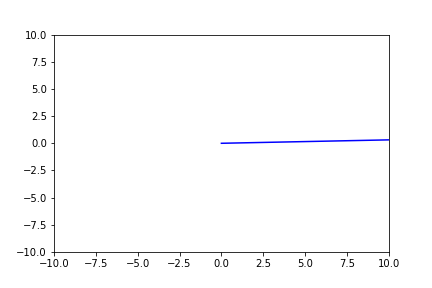
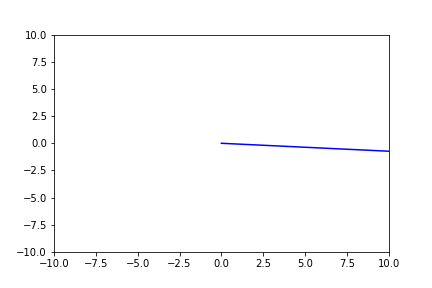
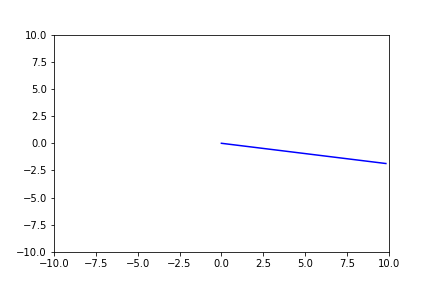
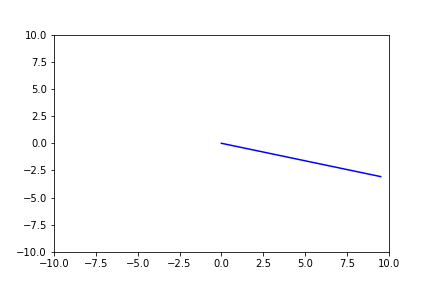
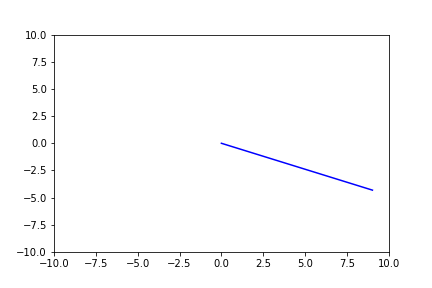
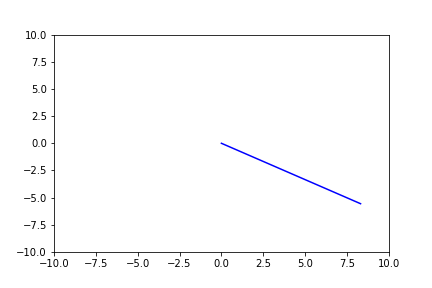
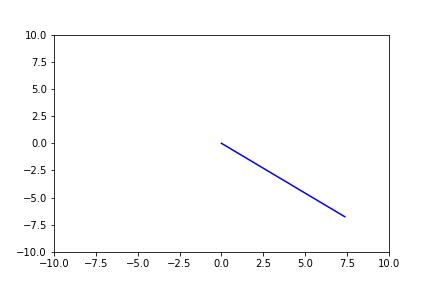
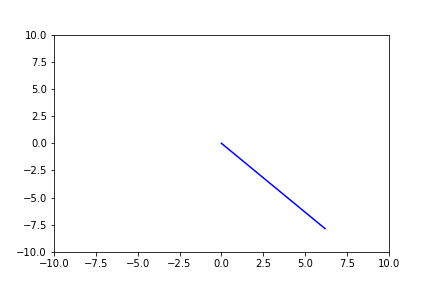
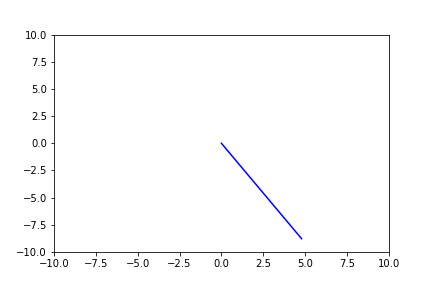
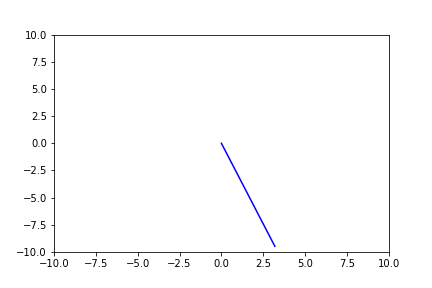
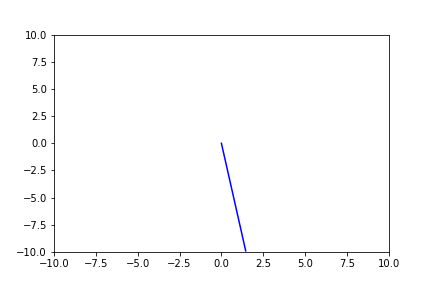
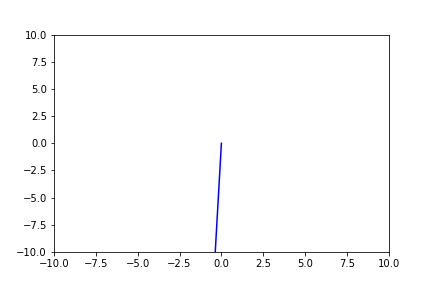
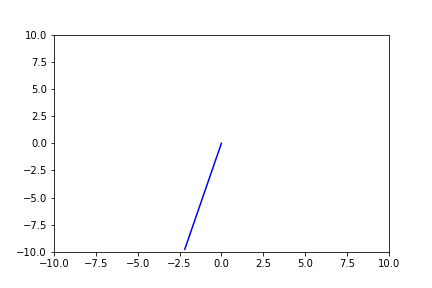
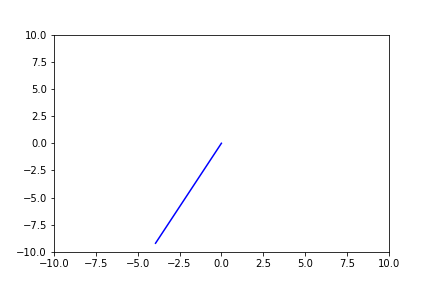
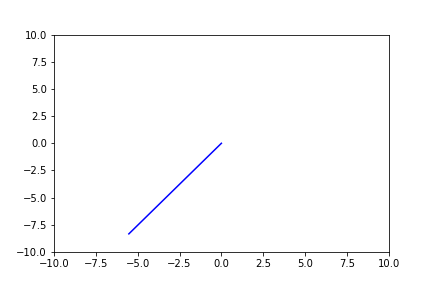
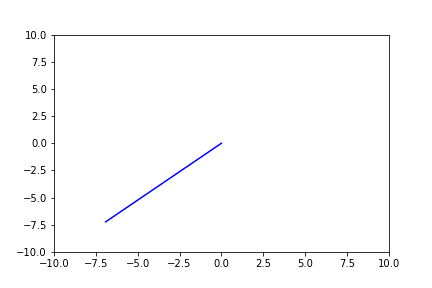
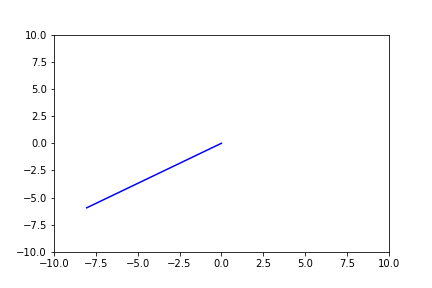
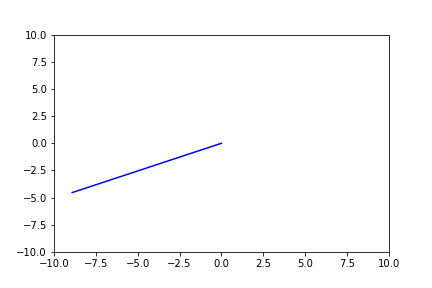
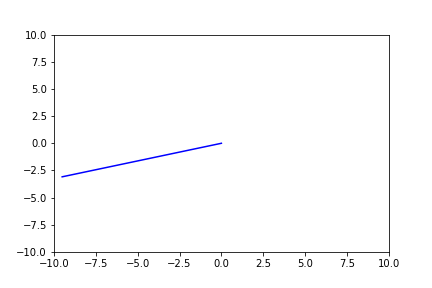
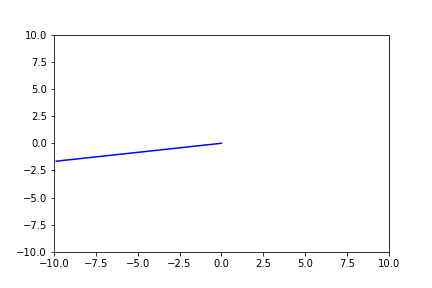
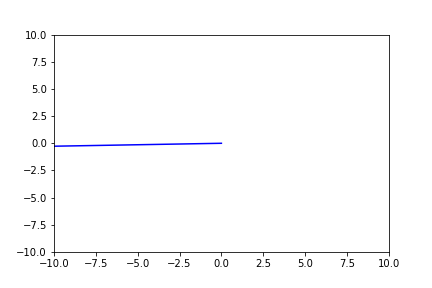
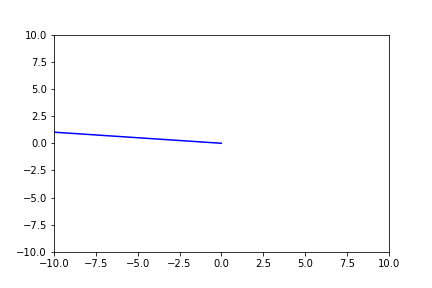
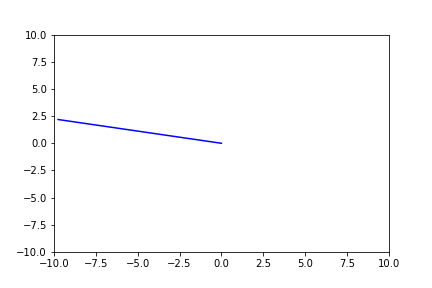
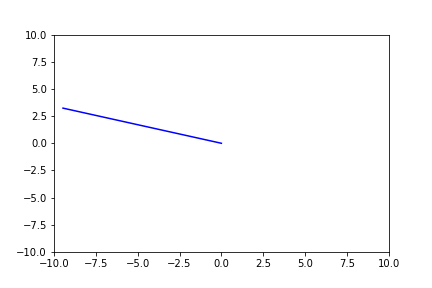
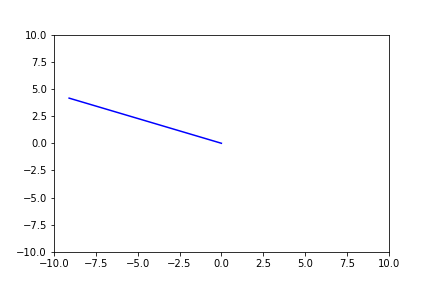
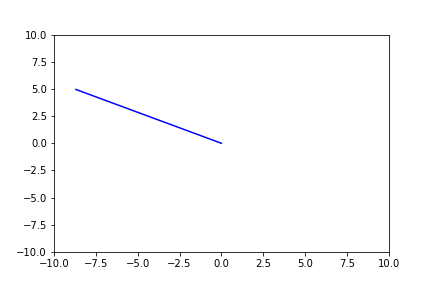
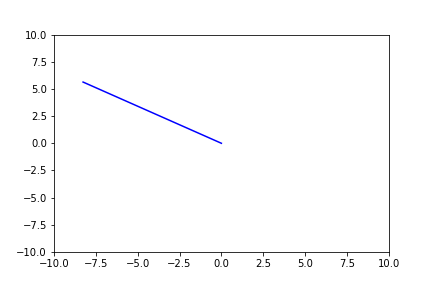
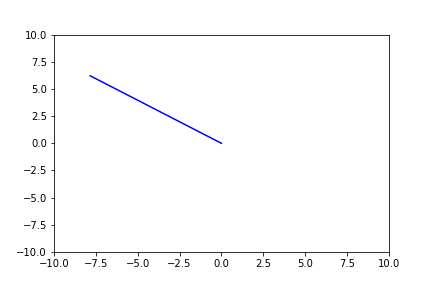
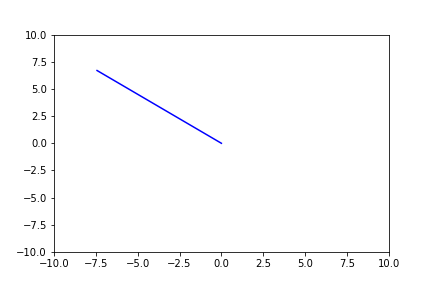
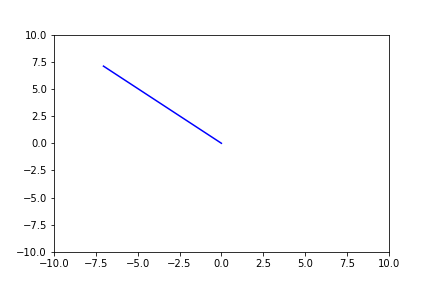
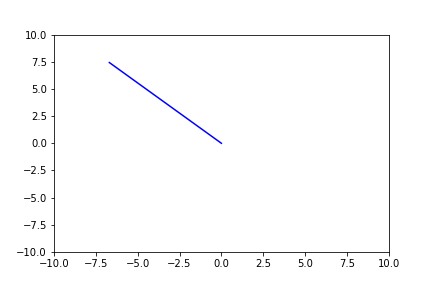
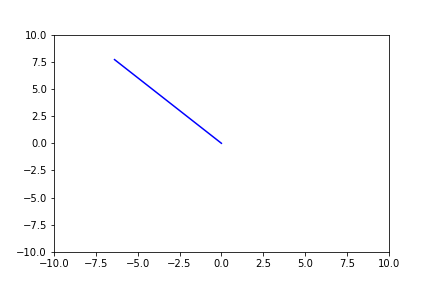
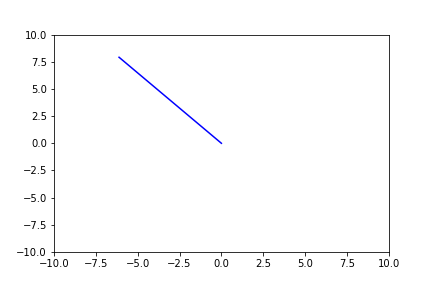
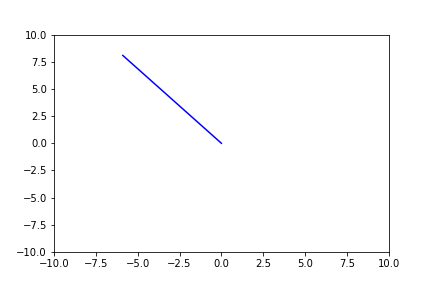
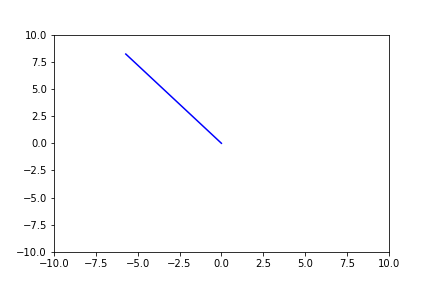
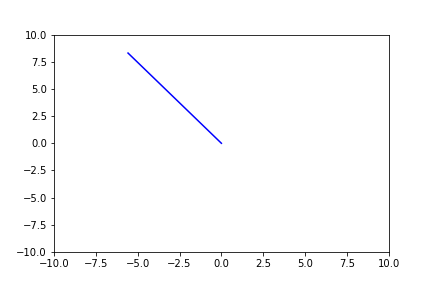
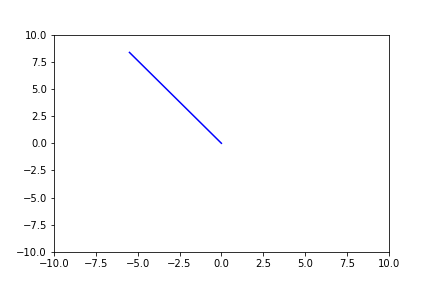
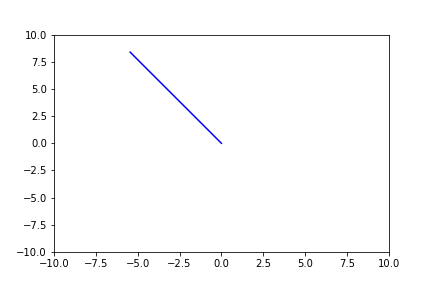
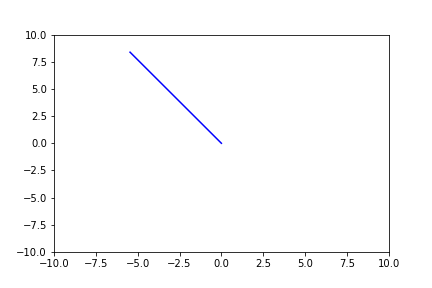
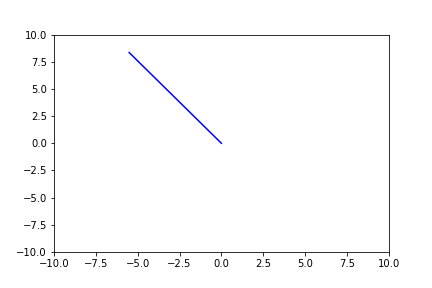
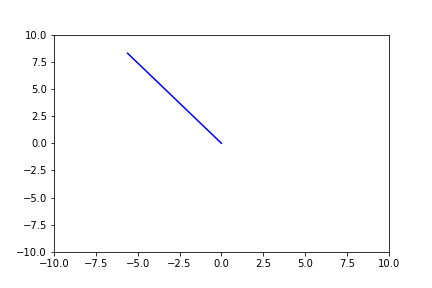
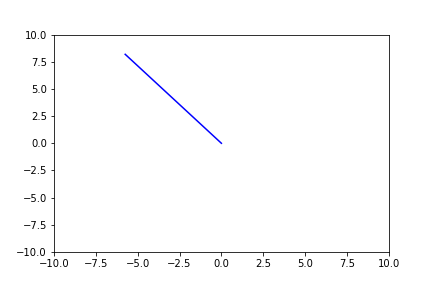
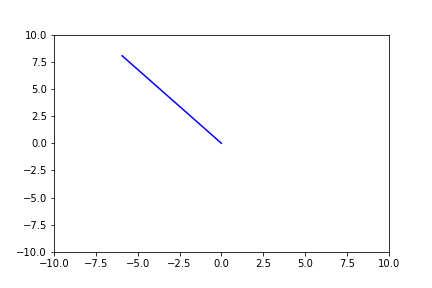
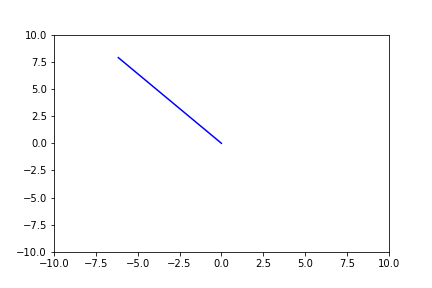
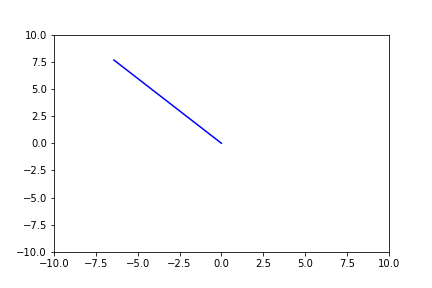
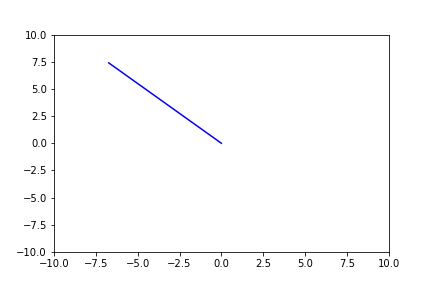
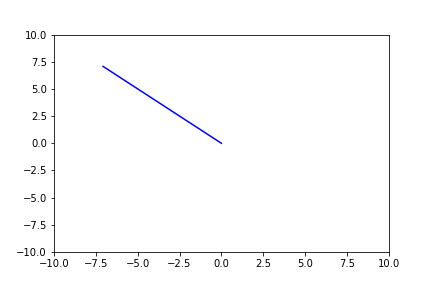
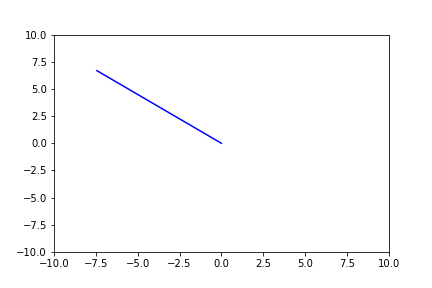
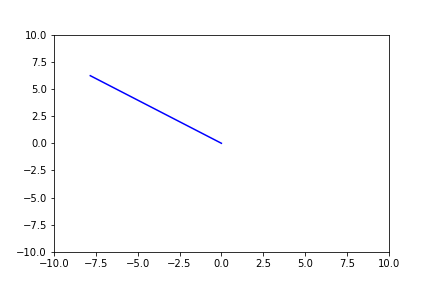
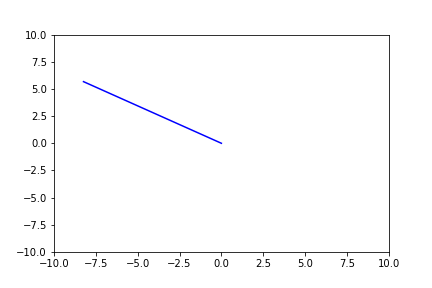
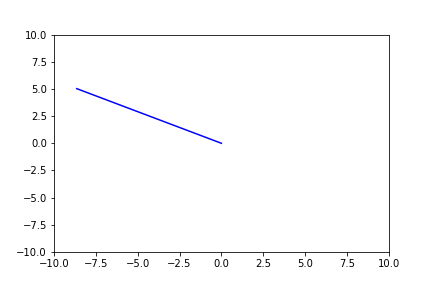
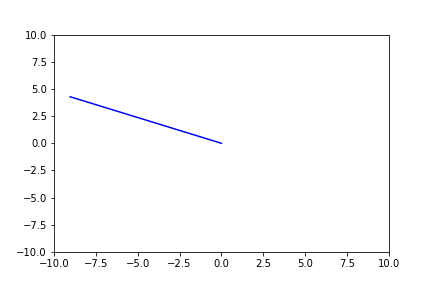
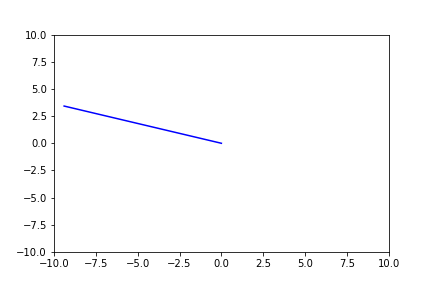
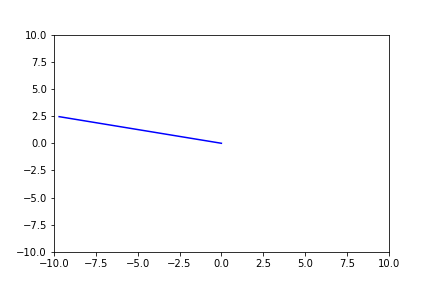
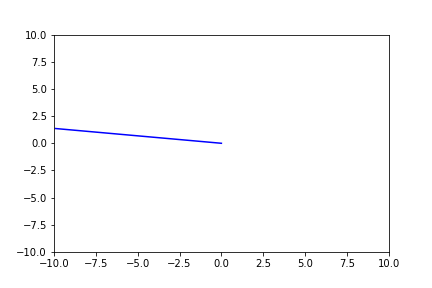
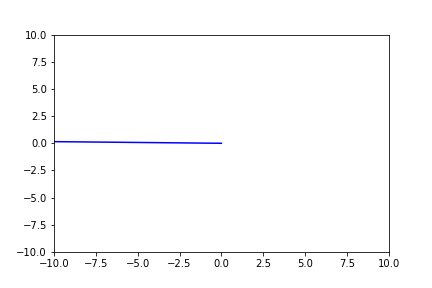
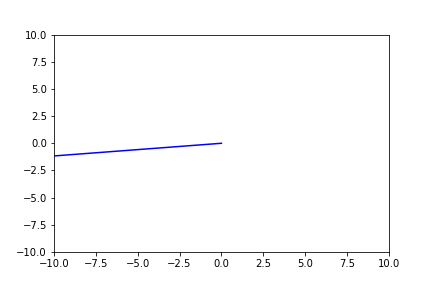
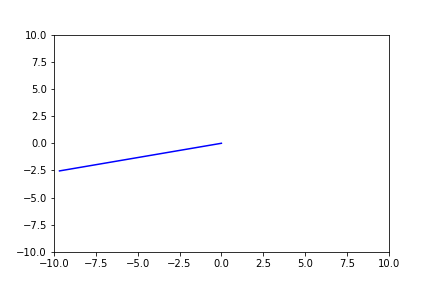
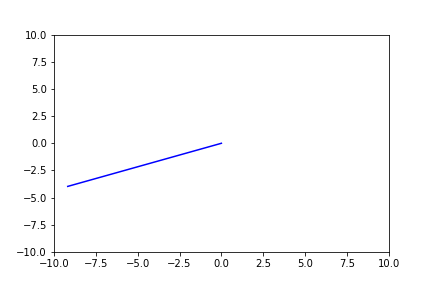
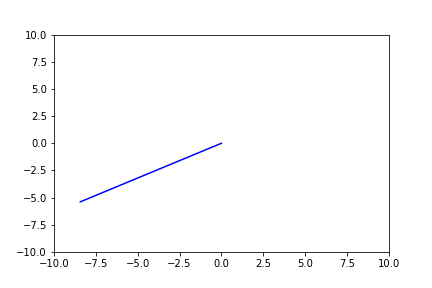
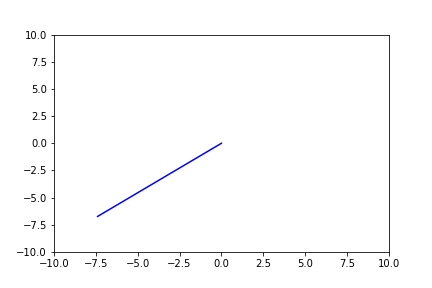
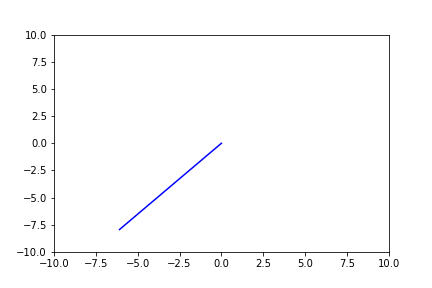
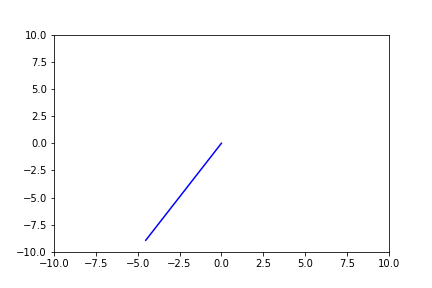
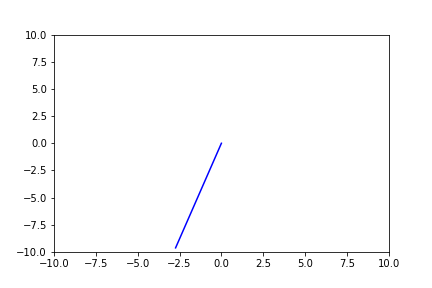
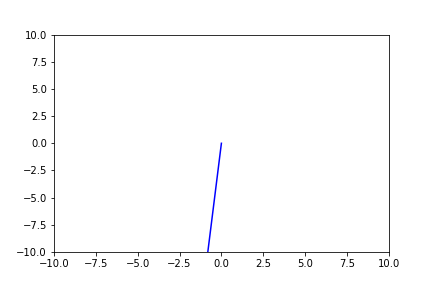
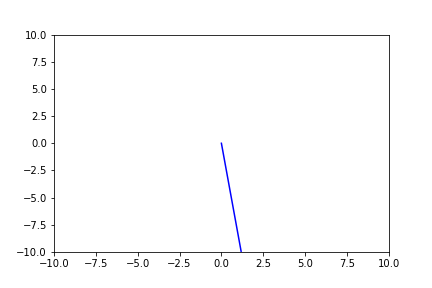
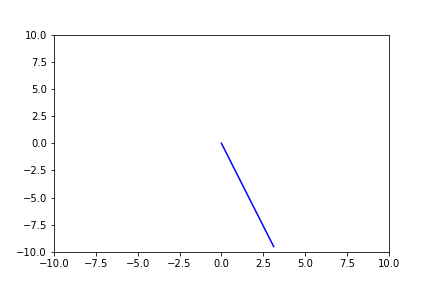
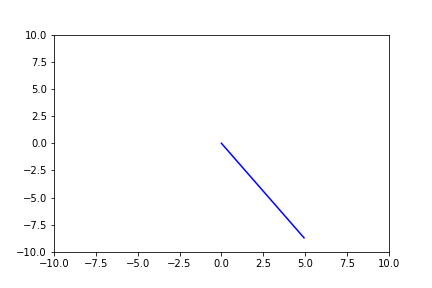
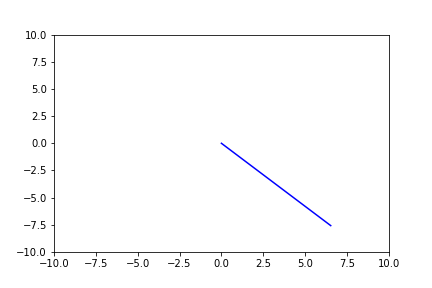
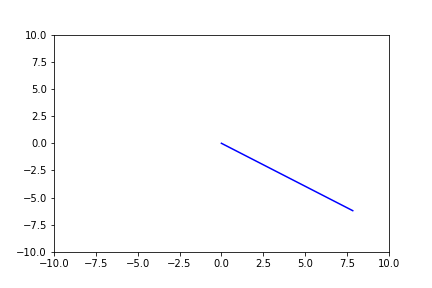
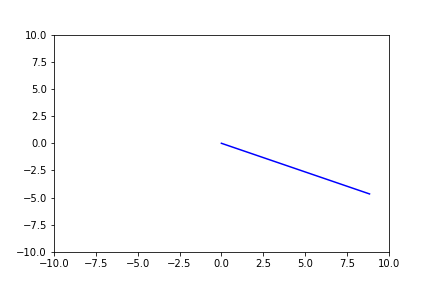
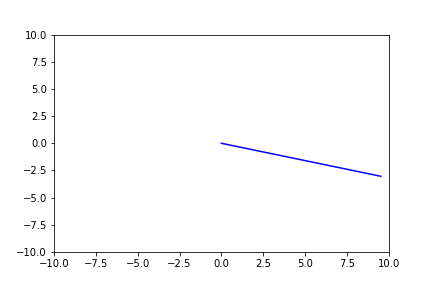
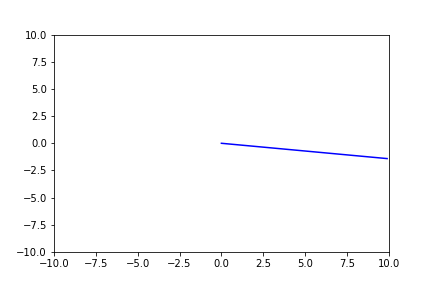
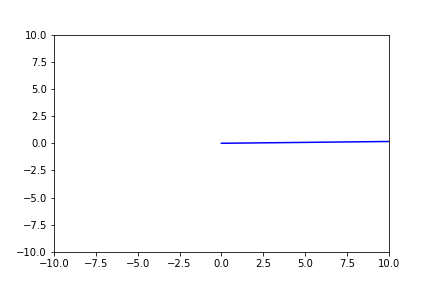
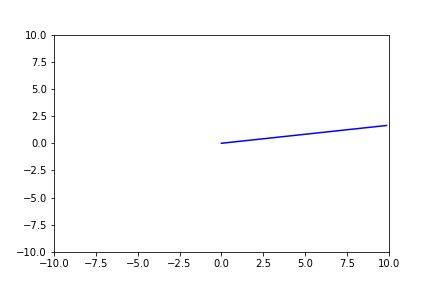
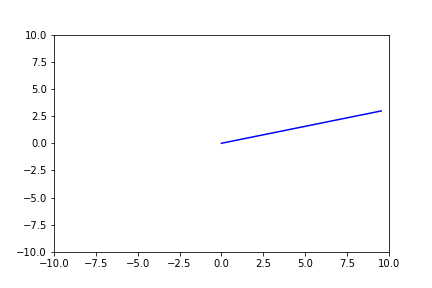
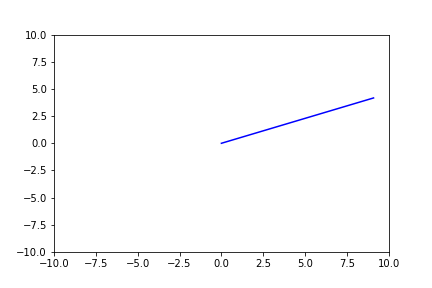
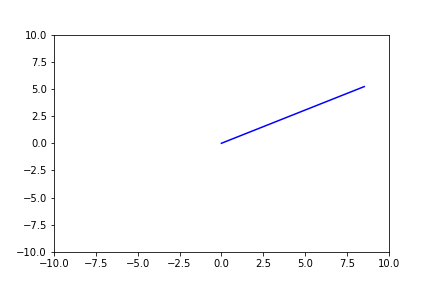
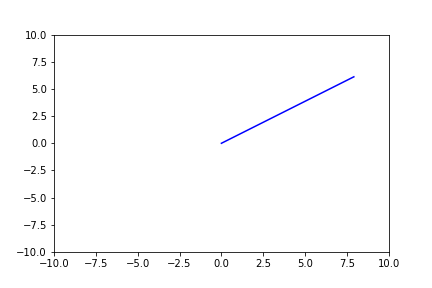
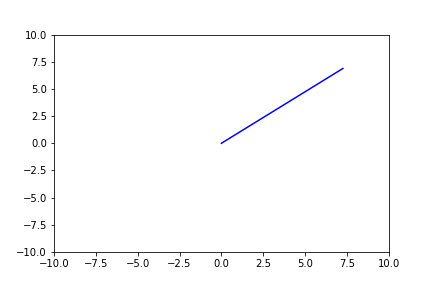
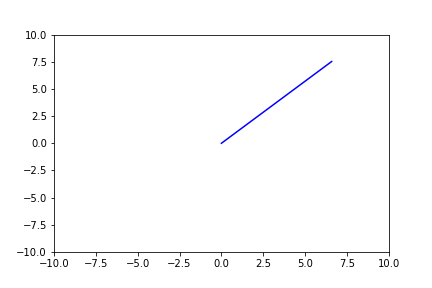
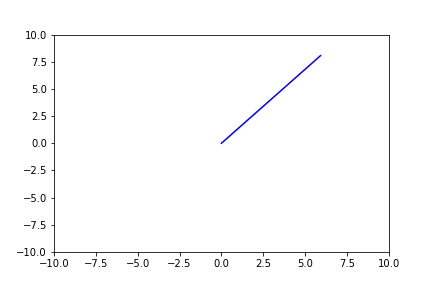
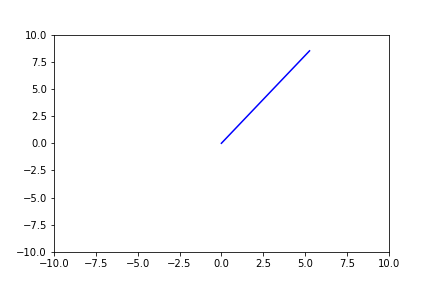
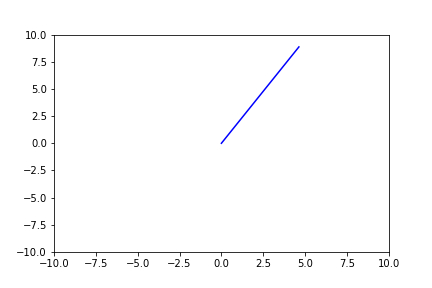
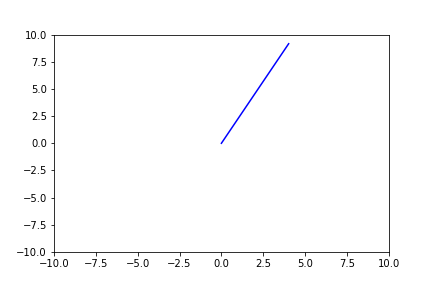
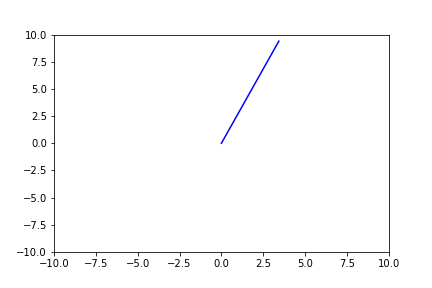
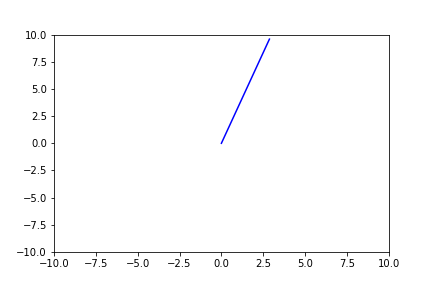
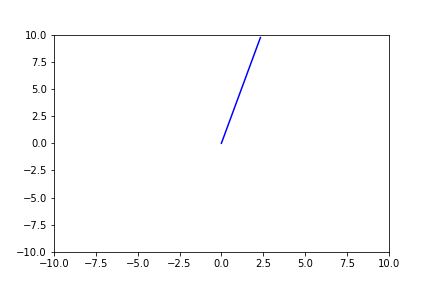
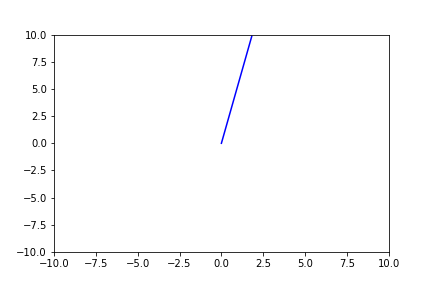
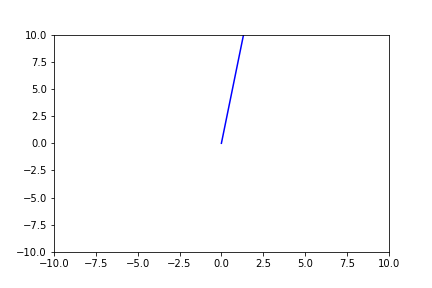
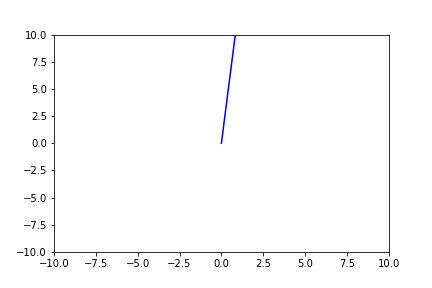
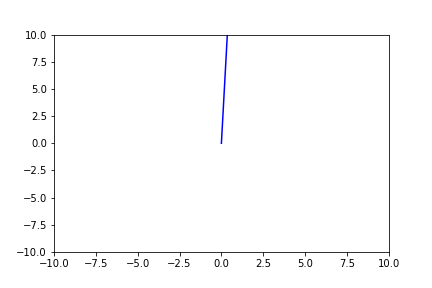
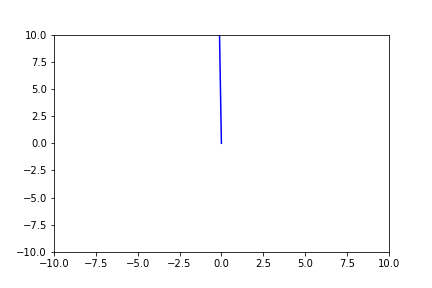
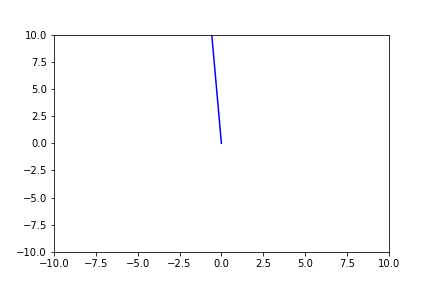
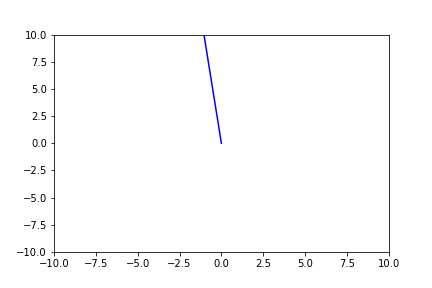
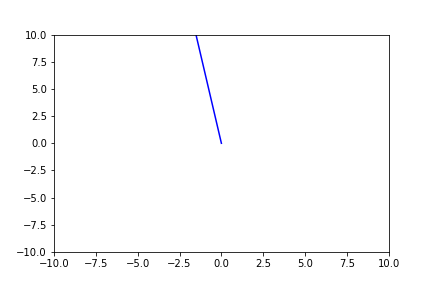
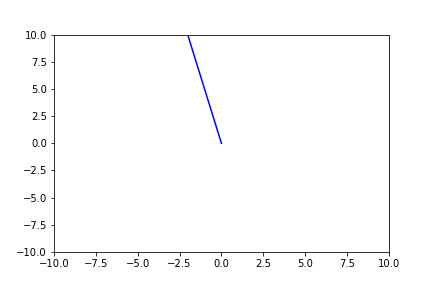
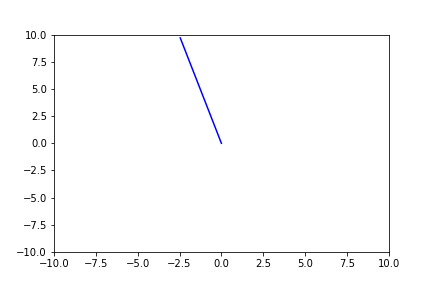
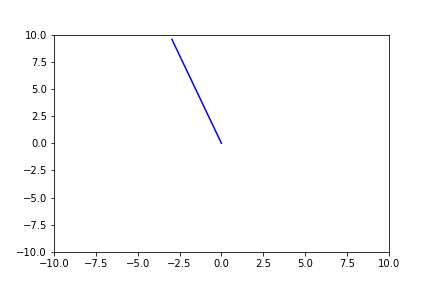
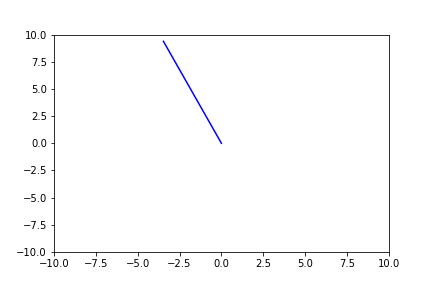
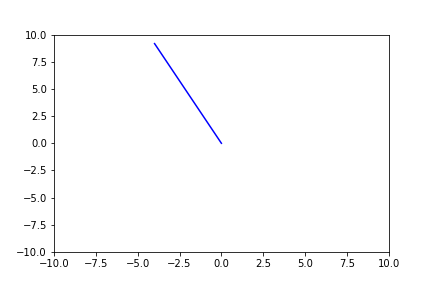
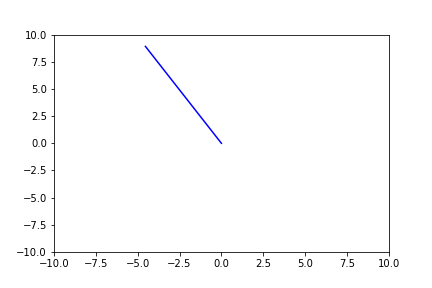
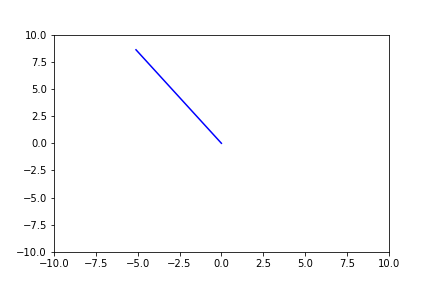
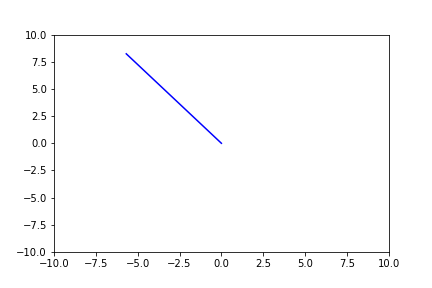
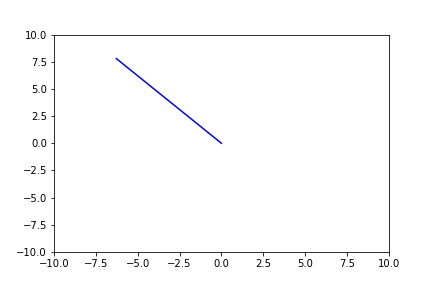
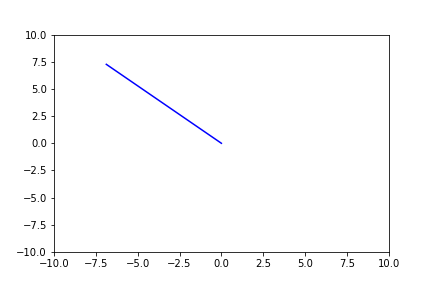
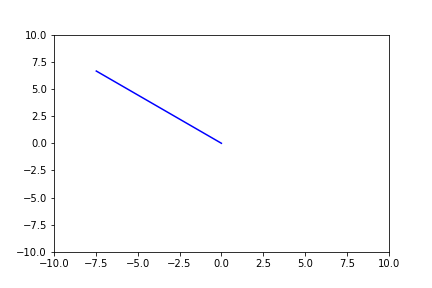
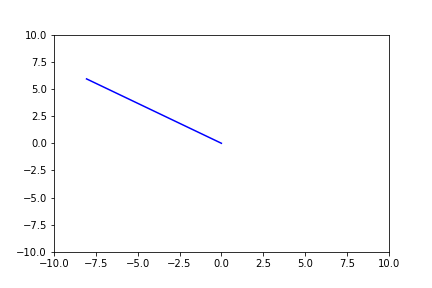
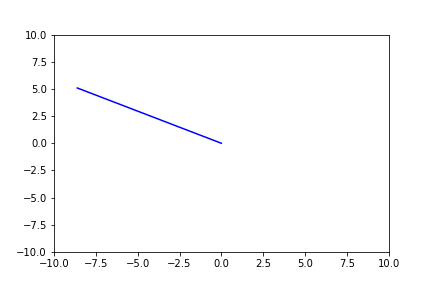
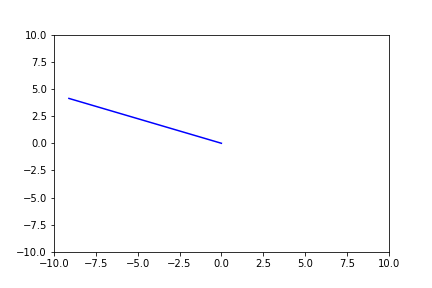
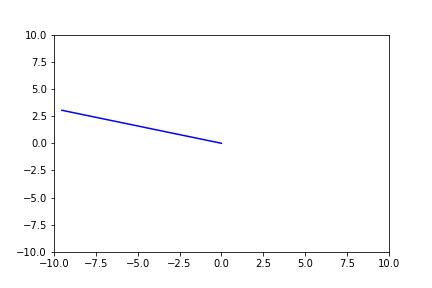
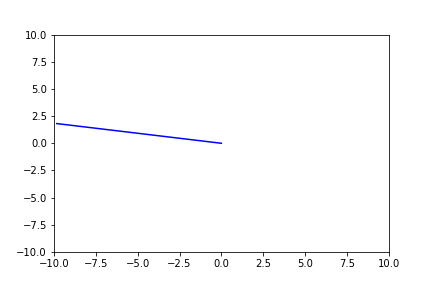
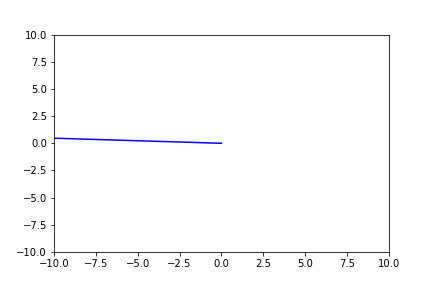
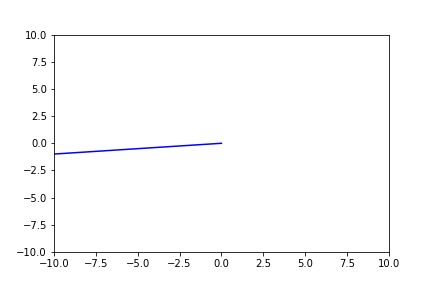
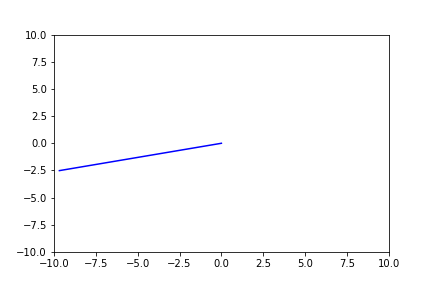
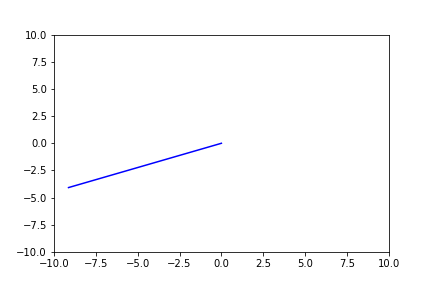
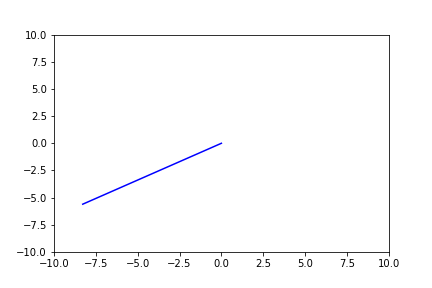
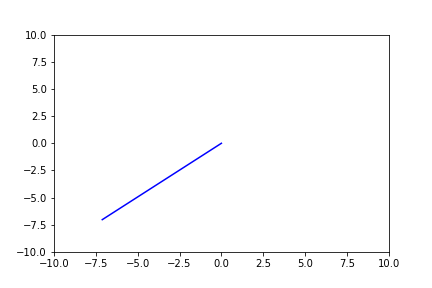
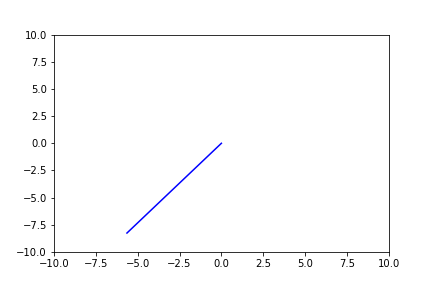
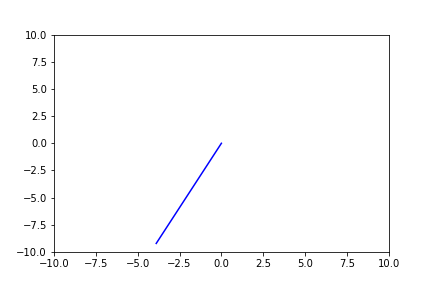
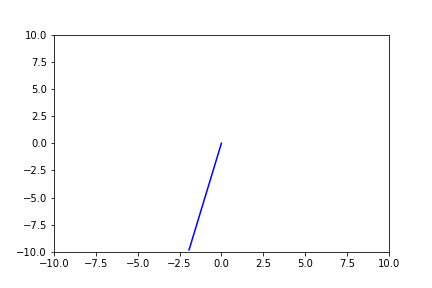
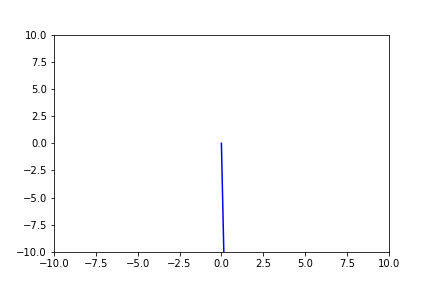
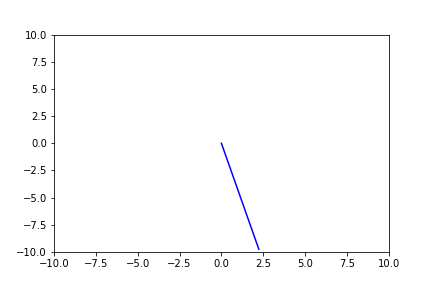
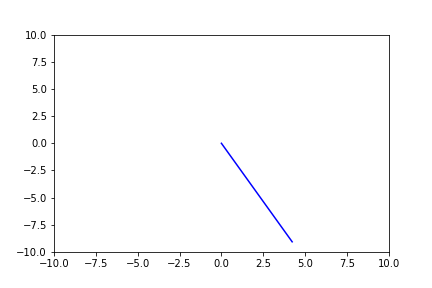
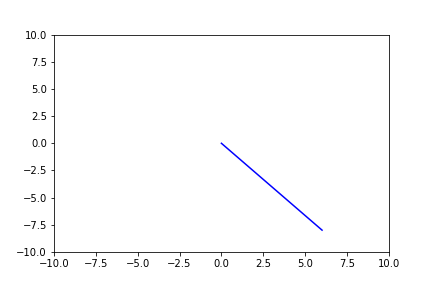
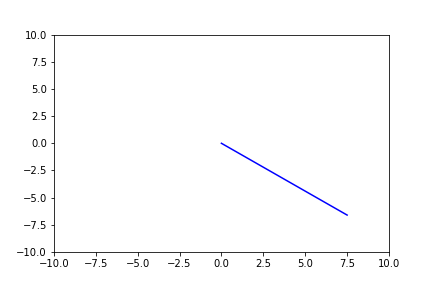
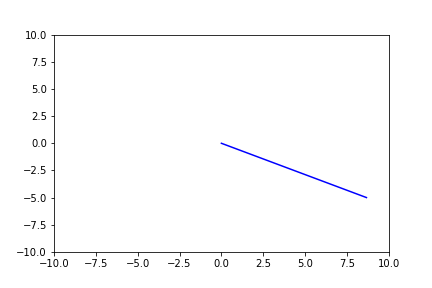
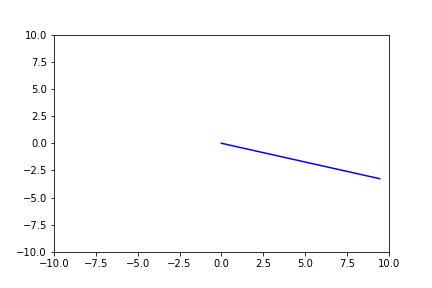
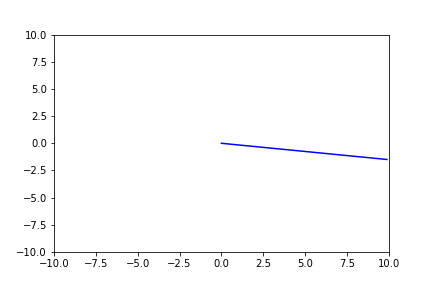
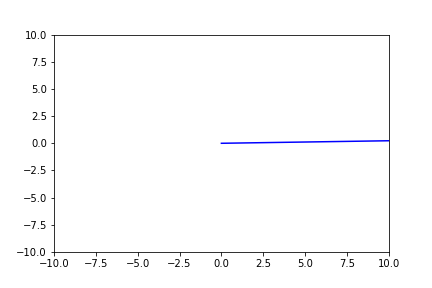
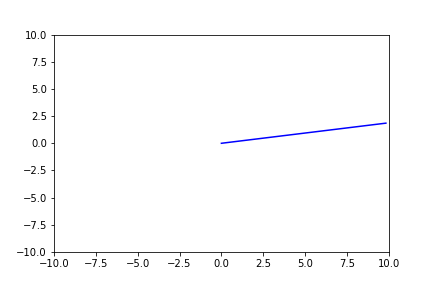
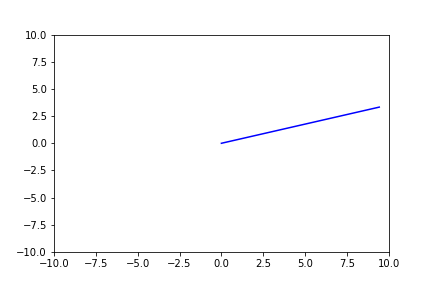
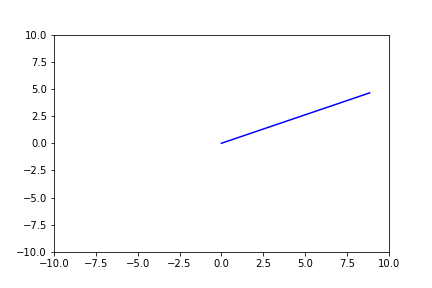
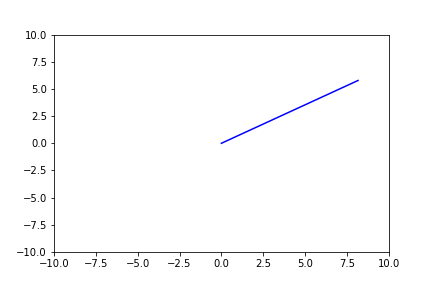
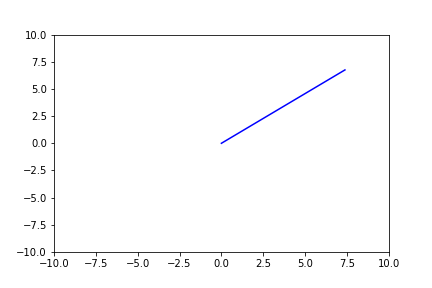
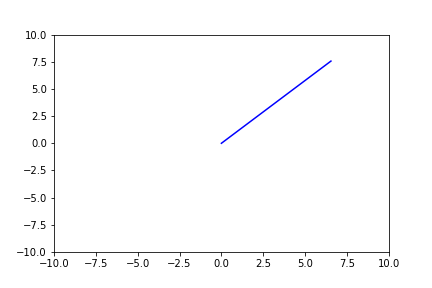
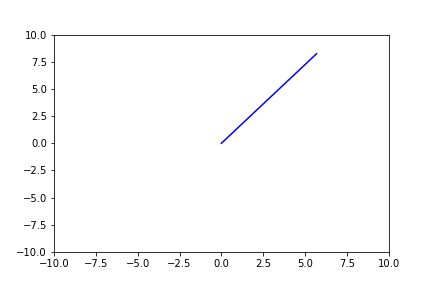
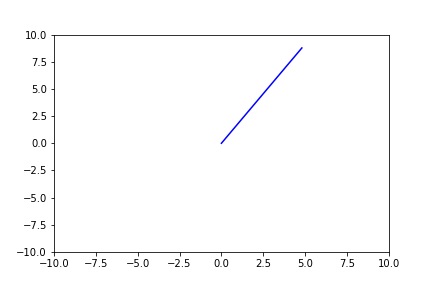
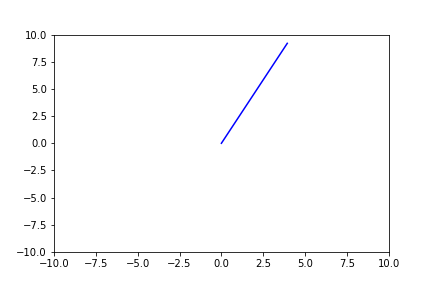
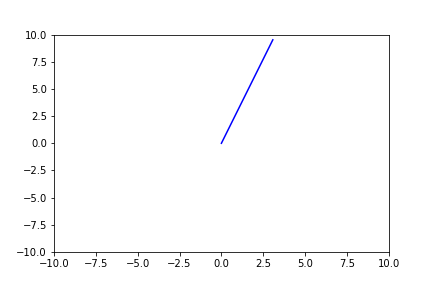
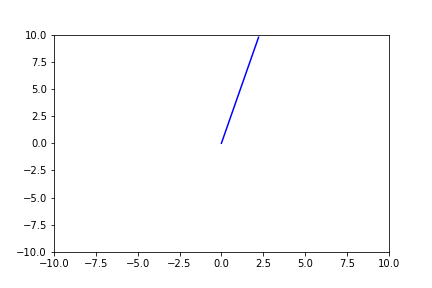
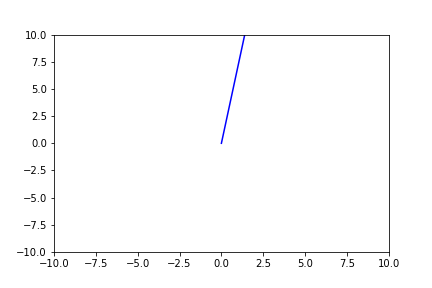
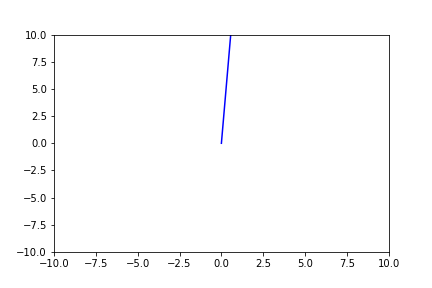
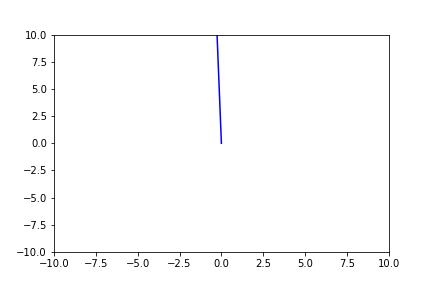
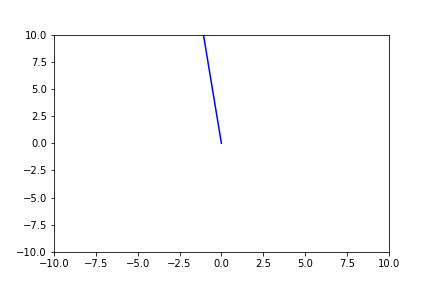
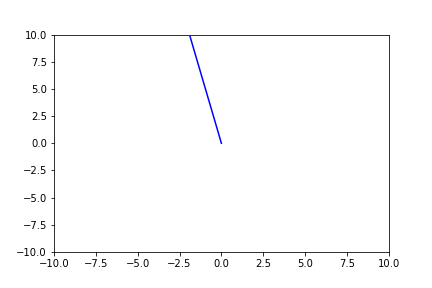
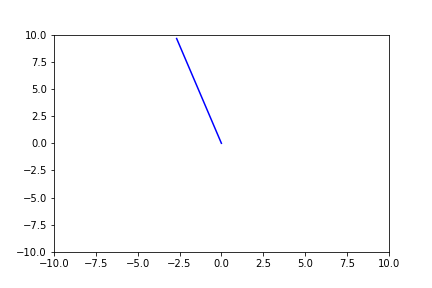
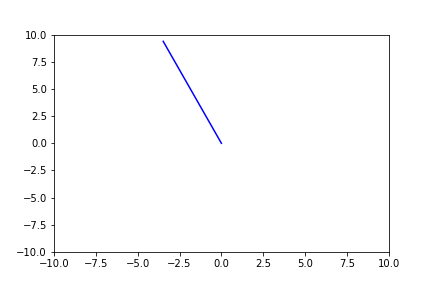
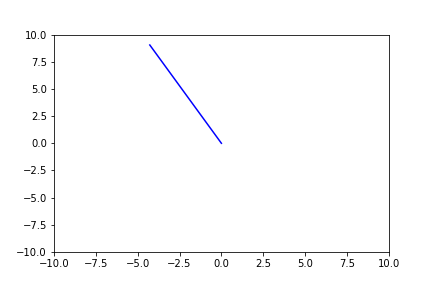
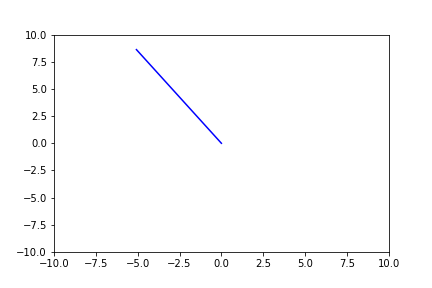
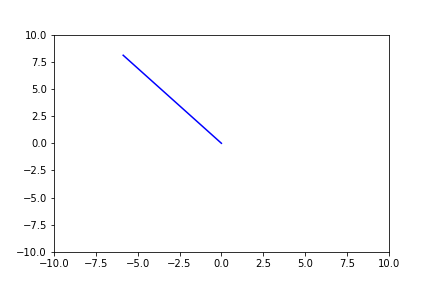
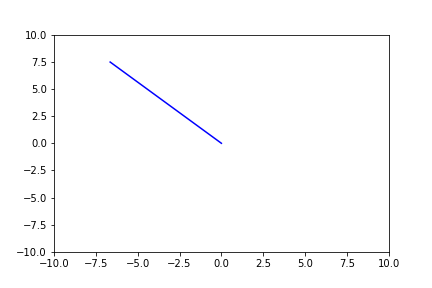
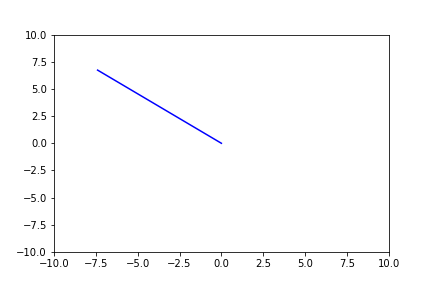
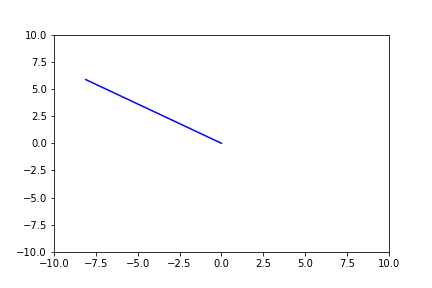
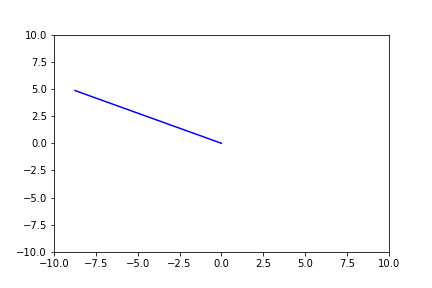
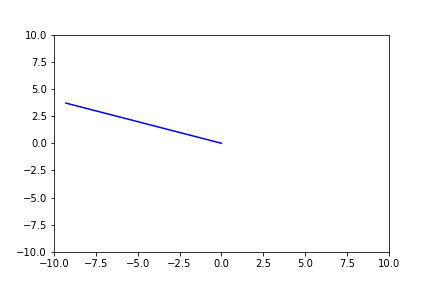
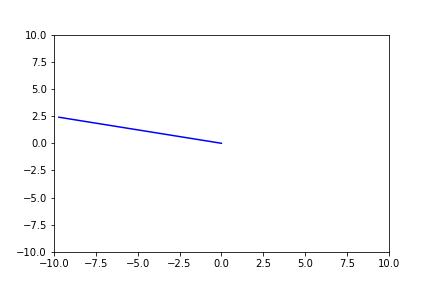
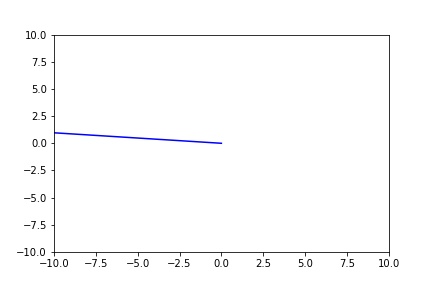
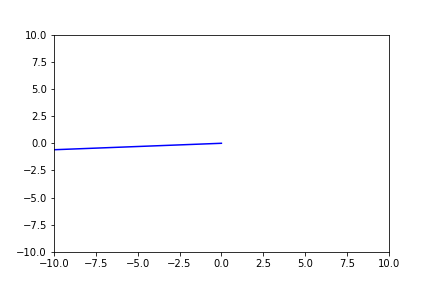
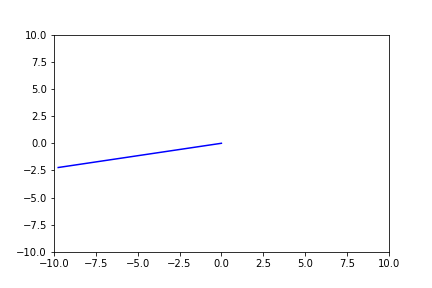
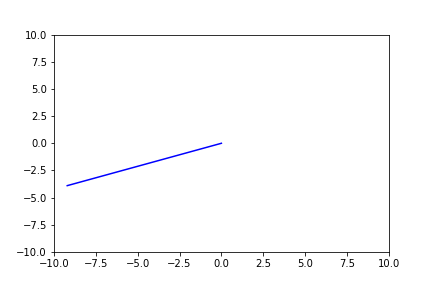
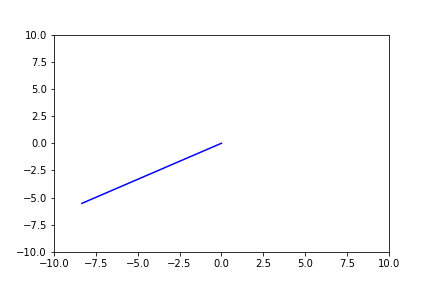
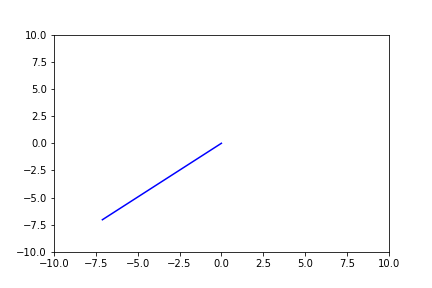
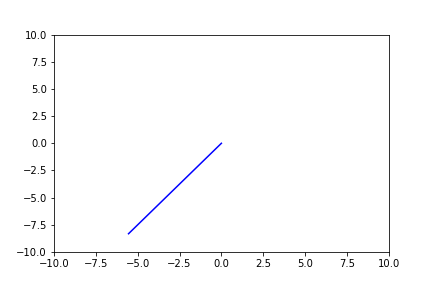
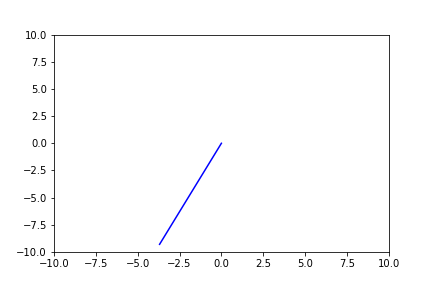
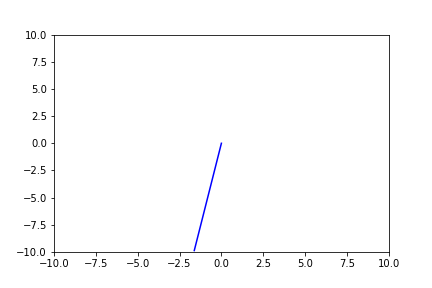
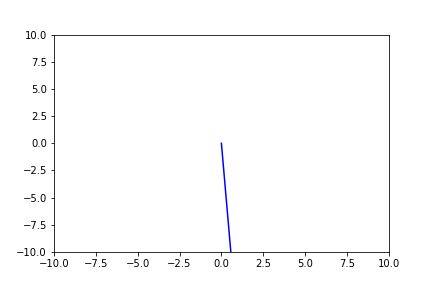
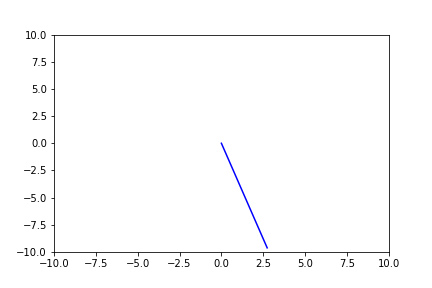
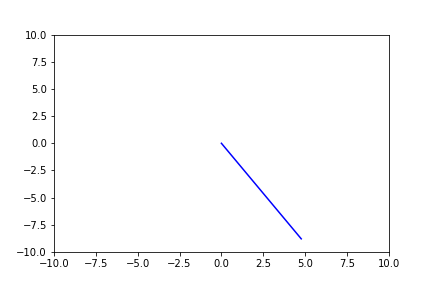
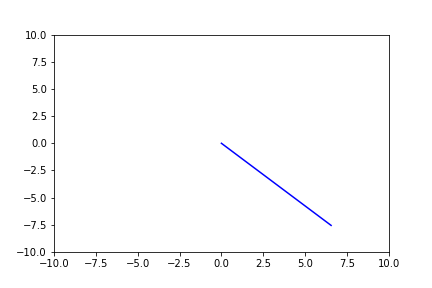
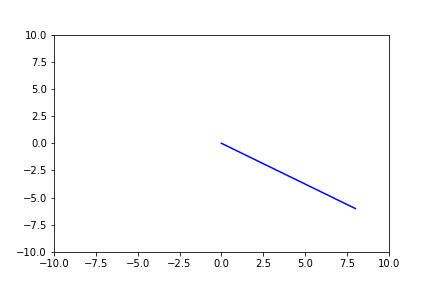
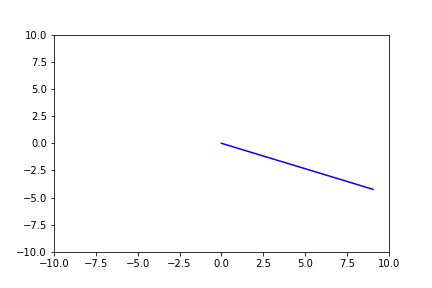
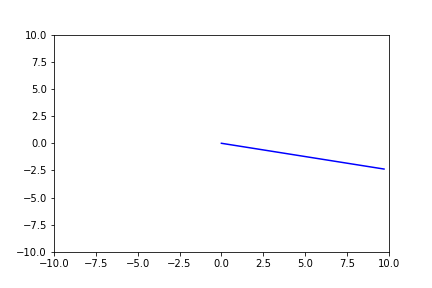
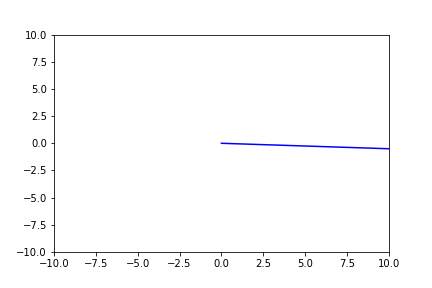
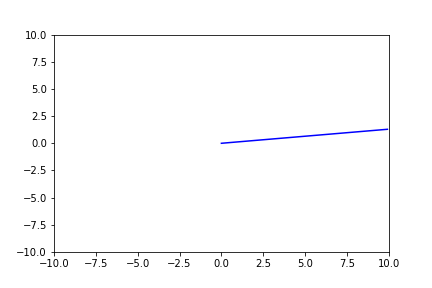
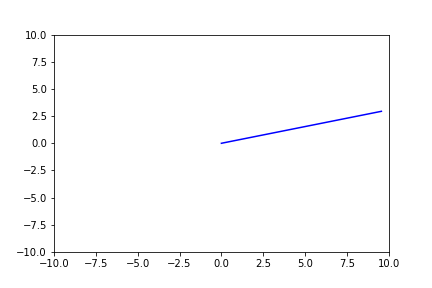
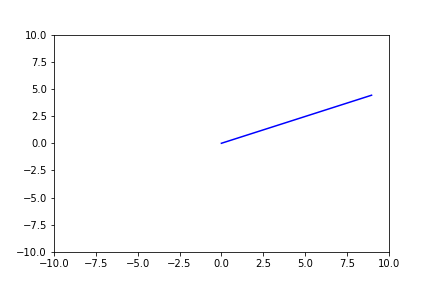
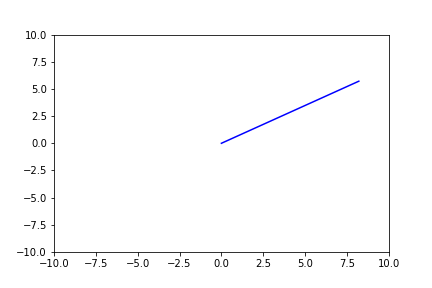
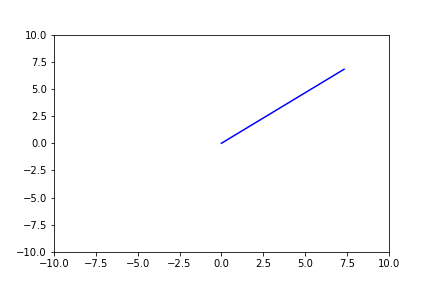
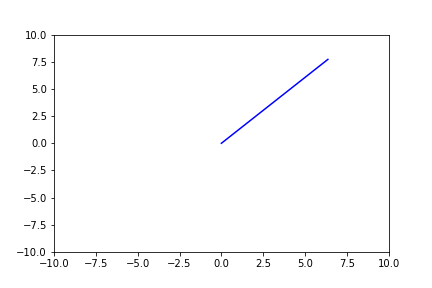
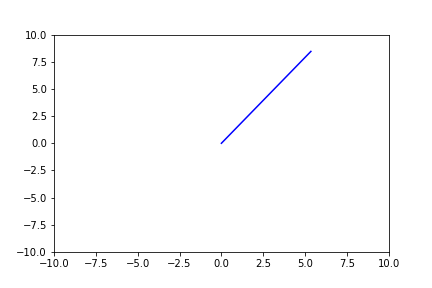
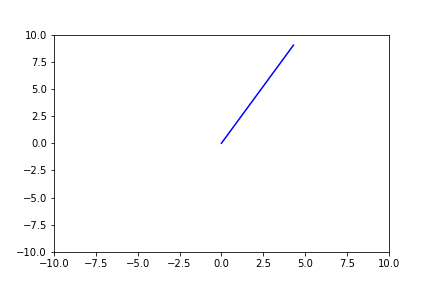
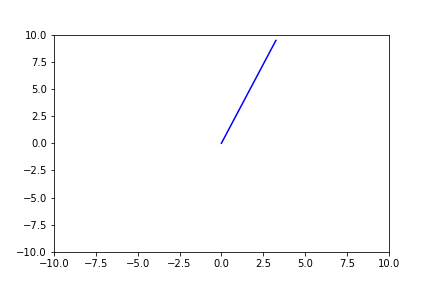
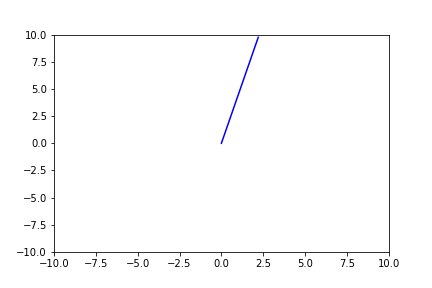
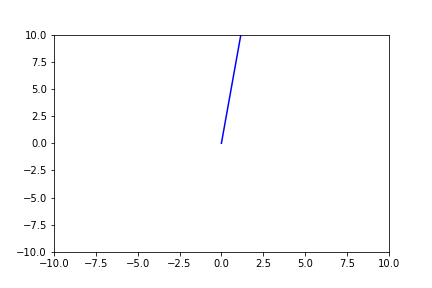
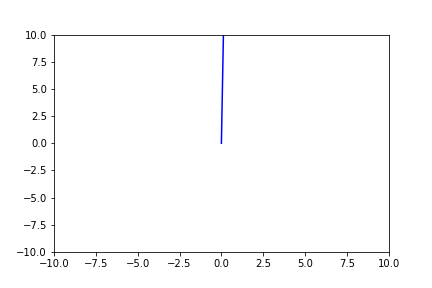
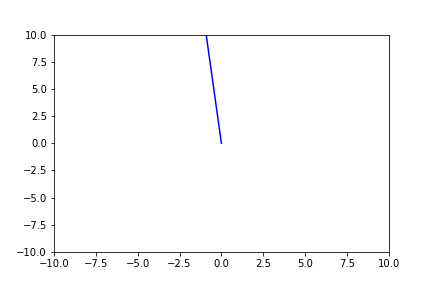
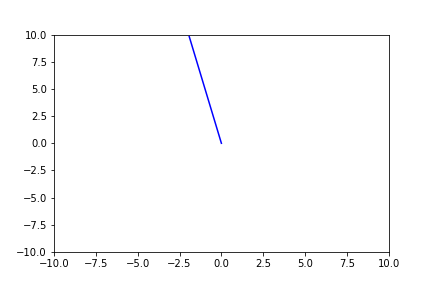
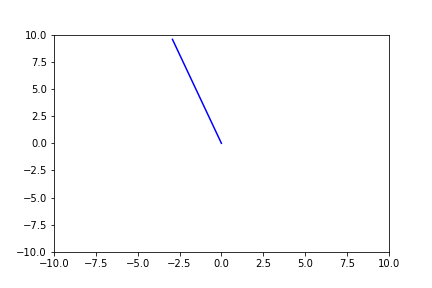
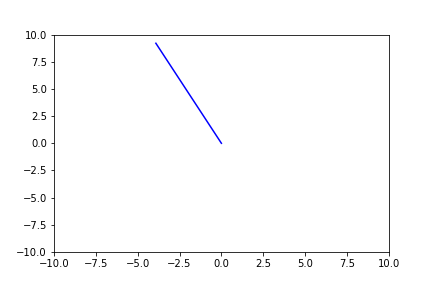
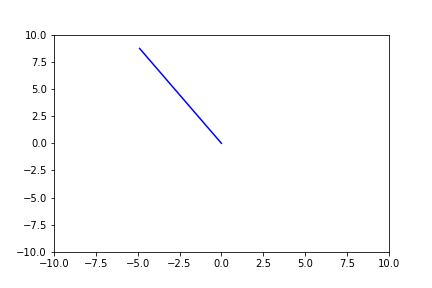
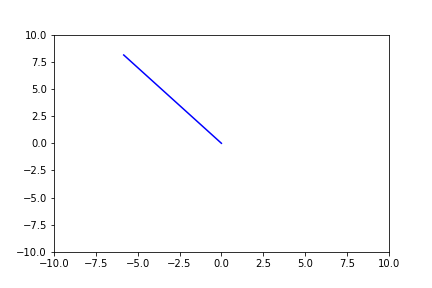

In [14]:
h=0.1 #numero de intervalos
q=np.pi/3.0
v=0.3
n=200
g=-10
L=10

fig = plt.figure()
#ax1 = fig.add_subplot(111)
ax1 = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
line, = ax1.plot([], [], c='b')

def calculate_q(q, v, n, g, L):
    q_list = []
    for k in np.arange(0,n):
        q_next=q+h*v
        v_next=v-h*((g/L)*np.sin(q))
        q_list.append(q)
    #ax1.scatter(q_next,v_next,c='b')
    #ax2.plot([0, L*np.sin(q)], [0, L*np.cos(q)],c='b')
        v=v_next
        q=q_next
    return q_list
        
q_list = calculate_q(q, v, n, g, L)

def init():
    return line,

def animate(i):
    line.set_data([0, L*np.sin(q_list[i])], [0, L*np.cos(q_list[i])])
    fig.canvas.draw()
    return line,
    
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=n, interval=100, blit=True)  